# After Preprocessing

/var/folders/qq/g1fc9b_10d1gd8z3wl4n208w0000gn/T/ipykernel_82853/273237515.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datasets/preprocessed.csv")  # Update file path if needed


Average Sentence Length: 18.77 words
Top 10 most common words: [('article', 110759), ('page', 85935), ('slut', 83368), ('s', 70268), ('wikipedia', 57267), ('like', 56867), ('edit', 54379), ('talk', 49209), ('think', 45964), ('know', 43110)]


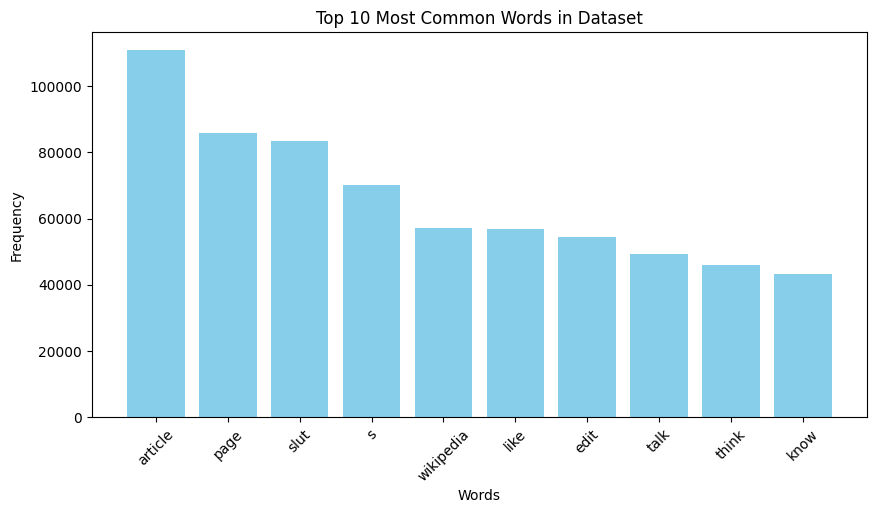

Lexical Diversity (TTR): 0.0142
Stopword Proportion: 0.00%
[]
Top 10 most common bigrams: []


In [47]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("../Datasets/preprocessed.csv")  # Update file path if needed

# make the column string
df["Preprocessed_Content"] = df["Preprocessed_Content"].astype(str)
# 1. Average Sentence Length (in words)
df["Sentence_Length"] = df["Preprocessed_Content"].apply(lambda x: len(x.split()))
average_sentence_length = df["Sentence_Length"].mean()
print(f"Average Sentence Length: {average_sentence_length:.2f} words")

# 2. Word Frequency
all_words = ' '.join(df["Preprocessed_Content"]).split()
word_counts = Counter(all_words)

# Display the 10 most common words
most_common_words = word_counts.most_common(10)
print("Top 10 most common words:", most_common_words)

# Plot word frequency
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Dataset")
plt.xticks(rotation=45)
plt.show()

# 3. Lexical Diversity (Type-Token Ratio)
unique_words = set(all_words)
lexical_diversity = len(unique_words) / len(all_words) if len(all_words) > 0 else 0
print(f"Lexical Diversity (TTR): {lexical_diversity:.4f}")

# 4. Stopword Proportion
all_stopwords = [
    word for words in df["Preprocessed_Content"].apply(lambda x: x.get("stopwords", []) if isinstance(x, dict) else []) 
    for word in words
]

stopword_proportion = len(all_stopwords) / len(all_words) if len(all_words) > 0 else 0
print(f"Stopword Proportion: {stopword_proportion:.2%}")

# 5. N-Gram Frequency (Bigrams)
from spacy.tokens import Doc

# Ensure 'Preprocessed_Content' contains a dictionary before accessing 'words'
bigrams = [
    bigram
    for tokens in df["Preprocessed_Content"].apply(lambda x: x.get("words", []) if isinstance(x, dict) else [])
    for bigram in get_bigrams(tokens)
]

bigram_counts = Counter(bigrams)

# Display the top 10 bigrams
print(bigram_counts.most_common(10))


# Display the top 10 bigrams
most_common_bigrams = bigram_counts.most_common(10)
print("Top 10 most common bigrams:", most_common_bigrams)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Preprocessed_Content'])

important_words = tfidf.get_feature_names_out()
print("Top 20 TF-IDF Words:", important_words)


Top 20 TF-IDF Words: ['article' 'like' 'page' 'slut' 'wikipedia']


# Before preprocessing

Average Sentence Length: 41.58 words
Top 10 most common words: [('the', 778242), ('to', 496638), ('a', 460630), ('i', 418021), ('you', 388623), ('and', 356582), ('is', 356319), ('of', 349613), ('it', 260312), ('that', 259826)]


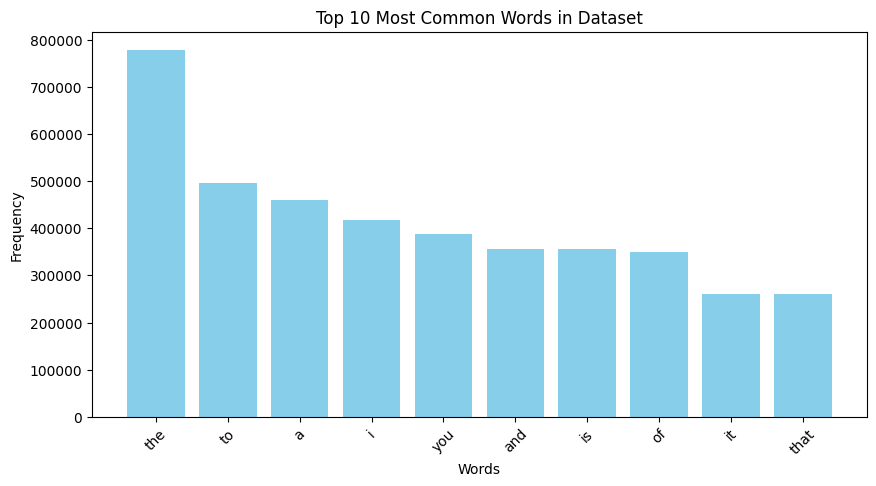

Lexical Diversity (TTR): 0.0073
Average Number of Stopwords Per Row: 0.00
Counter()
Top 10 most common bigrams: []


In [49]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from itertools import islice

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Load dataset
df = pd.read_csv("../Datasets/Final_data_Y_D.csv")  # Update file path if needed

# make the column string
df["Content"] = df["Content"].astype(str)
# 1. Average Sentence Length (in words)
df["Sentence_Length"] = df["Content"].apply(lambda x: len(x.split()))
average_sentence_length = df["Sentence_Length"].mean()
print(f"Average Sentence Length: {average_sentence_length:.2f} words")

# 2. Word Frequency
all_words = ' '.join(df["Content"]).split()
word_counts = Counter(all_words)

# Display the 10 most common words
most_common_words = word_counts.most_common(10)
print("Top 10 most common words:", most_common_words)

# Plot word frequency
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Dataset")
plt.xticks(rotation=45)
plt.show()

# 3. Lexical Diversity (Type-Token Ratio)
unique_words = set(all_words)
lexical_diversity = len(unique_words) / len(all_words) if len(all_words) > 0 else 0
print(f"Lexical Diversity (TTR): {lexical_diversity:.4f}")

# 4. Stopword Proportion
# Ensure that 'Content' contains dictionaries with a 'stopwords' key, and calculate stopwords per row
stopwords_per_row = df["Content"].apply(
    lambda x: len(x.get("stopwords", [])) if isinstance(x, dict) and "stopwords" in x else 0
)

# Calculate the average number of stopwords per row
average_stopwords_per_row = stopwords_per_row.mean()

print(f"Average Number of Stopwords Per Row: {average_stopwords_per_row:.2f}")



# 5. N-Gram Frequency (Bigrams)
from spacy.tokens import Doc

bigrams = [
    bigram
    for tokens in df["Content"].apply(lambda x: x.get("words", []) if isinstance(x, dict) else [])
    for bigram in get_bigrams(tokens)
]

bigram_counts = Counter(bigrams)

# Display the top 10 bigrams
print(bigram_counts)


# Display the top 10 bigrams
most_common_bigrams = bigram_counts.most_common(10)
print("Top 10 most common bigrams:", most_common_bigrams)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Content'])

# Get important words
important_words = tfidf.get_feature_names_out()
print("Top 20 TF-IDF Words:", important_words)


Top 20 TF-IDF Words: ['article' 'just' 'page' 'slut' 'wikipedia']
